In [ ]:
from google.colab import drive
# connect to drive: if success, a window will pop up to let you click and choose the account.
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_DIR = "/content/drive/MyDrive/wb_localization_dataset"

In [ ]:
#install ultralytics
!pip install ultralytics

- More details about YOLOv8's architecture can be found on the internet
- YOLOv8 có nhiều biến thể: nano, small, medium, big,.... => để triển khai trên các thiết bị có phần cứng khác nhau như camera siêu nhỏ thì chip cũng siêu nhỏ, thì chỉ nên dùng yolov8 nano kiểu vậy. Còn đâu có cái GPU to, phần cứng tính toán to hơn có thể dùng yolov8 big => các phiên bản YOLO kiến trúc cơ bản giống nhau nhưng có thể khác nhau một vài chi tiết nào đó => ai đam mê thì lên mạng đọc
- Trong paper, của thầy thì thầy thử nghiệm các phiên bản khác nhau của YOLOv8 với bộ siêu tham số (hyperparameters) giống nhau như dưới:
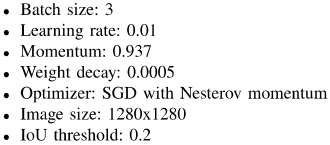

- Kết quả của thầy là YOLOv5x xịn nhất nhưng tốn thời gian nhất vì nó to nhất, nên t đã train theo model có kết quả xịn thứ 2 là YOLOv5m
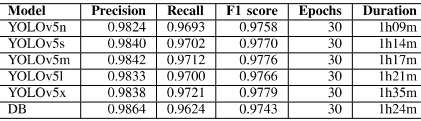

- Bọn m thích train gì thì train, thử nghiệm với bộ siêu tham số nào cũng được, thử YOLOv5n hay YOLOv5s nào cũng được miễn là khác để chứng tỏ với thầy là bọn em có thử nhiều bộ khác nhau - tối nay t đang bận chưa chia được nên bọn m có thể làm cái khác trước, trưa mai 1h chiều t sẽ post lên là ai thử với cái gì sau.

In [ ]:
import os

from ultralytics import YOLO

# if train from scratch, do like this below => it can be understood as initializing the model with parameters
# yolov8 cũng có các họ nano - medium - small - .... => phía dưới load yolov8m
model = YOLO("/content/drive/MyDrive/wb_localization_dataset/Hung_res_pt/runs/detect/train10/weights/best.pt")
#nếu load model đã pretrain => t đã đổi tên model trưa nay t show cho bọn m
#model = YOLO("/content/drive/MyDrive/wb_localization_dataset/best_YOLOv8_30_4_2024_v2_Ha.pt")

- Tài liệu: ultralytics -> https://docs.ultralytics.com/modes/train/
- Train thì để đó đi làm việc khác không mất kết nối mạng là được - nhưng nếu chạy xong cell này mà m quên k vào lại notebook này quá 30ph hay 45ph gì đó thì nó sẽ tự động runtime disconnected và toang => đi làm việc khác nhưng vẫn phải để ý
- Lúc nó chạy (XIN NHẮC LẠI: chỉ lúc nó chạy thì nó sẽ có folder "runs" => bọn m click vào biểu tượng thứ 4 dưới cùng để xem folder đó
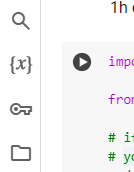

- Lưu file runs đó theo hướng dẫn của Lâm trong nhóm hoặc tải bằng tay như t trưa nay tất cả các file trong này: runs thì sẽ có train hoặc val => m k tải thì sau này mở lại notebook này nó sẽ mất dù m đã train rồi

In [ ]:
# bắt đầu train thì chạy cell này => truyền các siêu tham số phải đúng thứ tự => thứ tự như nào đọc doc của ultralytics
results = model.train(data = os.path.join (ROOT_DIR, "/content/drive/MyDrive/wb_localization_dataset/colab_config_anizme.yaml"), epochs = 100,
            batch = 4,
            pretrained = True,
            imgsz = 1280,
            optimizer = 'SGD',
            lr0 = 0.01,
            momentum = 0.937, weight_decay = 0.0005)

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/wb_localization_dataset/anizme_res_pt/yolov5_0.879_ver2/detect/train/weights/best.pt, data=/content/drive/MyDrive/wb_localization_dataset/colab_config_anizme.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

train: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/Hang_train1/labels/train.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/Hang_train1/labels/val.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.91G     0.6921       0.43     0.8645        971       1280: 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.76s/it]

                   all         29       5073      0.986      0.979      0.992      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.92G     0.6614     0.3959     0.8613        307       1280: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         29       5073      0.989      0.972      0.989      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.18G     0.6138     0.3465     0.8431        848       1280: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all         29       5073      0.985      0.968      0.987      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.58G     0.6364     0.3523     0.8587        542       1280: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all         29       5073      0.985      0.974      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       8.8G     0.6179     0.3251     0.8581       1046       1280: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         29       5073      0.986      0.968       0.99      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.19G     0.6384     0.3398     0.8401       1049       1280: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all         29       5073      0.988      0.971      0.991      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.94G     0.6313     0.3332     0.8313        786       1280: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         29       5073      0.988      0.971      0.991      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        10G     0.6704     0.3389     0.8608        688       1280: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.984      0.969       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.98G     0.6824     0.3412     0.8913        361       1280: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         29       5073      0.981       0.97      0.989      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.79G     0.6685      0.336     0.8542        525       1280: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all         29       5073      0.981       0.97      0.989      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.5G     0.7892     0.3787     0.8547        584       1280: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.986      0.971      0.989      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.08G     0.7632     0.3696     0.8679        684       1280: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         29       5073      0.986      0.971      0.989      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.87G     0.7784     0.3764     0.8833        588       1280: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all         29       5073      0.981      0.962      0.986      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.41G      0.771     0.3735     0.8617       1184       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all         29       5073      0.981      0.962      0.986      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.65G     0.7672     0.3692     0.8727        868       1280: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         29       5073      0.977      0.966      0.986      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.41G     0.8021     0.3865     0.8839        793       1280: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.977      0.966      0.986      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       8.7G     0.7931     0.3754     0.8985        359       1280: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         29       5073      0.983       0.95       0.98      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.95G      0.689     0.3608     0.8593        562       1280: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all         29       5073      0.983       0.95       0.98      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.57G     0.7164     0.3626     0.8483        623       1280: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all         29       5073      0.983       0.95       0.98      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.34G     0.7472     0.3702     0.9133        474       1280: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         29       5073       0.98      0.973      0.989      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.69G     0.7797     0.3831     0.8646        805       1280: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073       0.98      0.973      0.989      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.67G     0.7284     0.3566     0.8773        356       1280: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         29       5073      0.979       0.96      0.987       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.57G     0.7481     0.3602     0.8655        653       1280: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         29       5073      0.979       0.96      0.987       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.25G     0.7871     0.3729     0.8464       1154       1280: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         29       5073      0.983      0.922      0.958      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.2G     0.6895     0.3437     0.8703        466       1280: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all         29       5073      0.983      0.922      0.958      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.11G     0.7159     0.3562     0.8579        968       1280: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         29       5073      0.978       0.93      0.968      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.03G     0.7032     0.3519     0.8917        340       1280: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all         29       5073      0.978       0.93      0.968      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.01G      0.703     0.3454     0.8758        402       1280: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all         29       5073      0.978       0.93      0.968      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.15G     0.6646     0.3545     0.8501       1021       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all         29       5073      0.984      0.941      0.976      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       9.4G     0.6546     0.3469      0.854        505       1280: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         29       5073      0.984      0.941      0.976      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.17G     0.6594     0.3613     0.8528        607       1280: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all         29       5073      0.968      0.949      0.984      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.63G     0.6622     0.3581     0.8467        535       1280: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.968      0.949      0.984      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.27G     0.6737     0.3702     0.8586        686       1280: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         29       5073      0.983      0.967       0.99      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.81G     0.6766     0.3586     0.8661        523       1280: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         29       5073      0.983      0.967       0.99      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       8.3G     0.6591     0.3436     0.8573        562       1280: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all         29       5073      0.983      0.967       0.99      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.24G     0.6336     0.3326     0.8577        767       1280: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         29       5073      0.971      0.967      0.988      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.83G     0.6139     0.3283     0.8402        497       1280: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.971      0.967      0.988      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.5G     0.6453     0.3384     0.8543        805       1280: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         29       5073      0.983      0.968      0.991      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.73G     0.6661     0.3397     0.8592        516       1280: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.983      0.968      0.991      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.72G     0.6519     0.3418     0.8271       1095       1280: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.988      0.966       0.99       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.4G     0.6426     0.3353     0.8373       1016       1280: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         29       5073      0.988      0.966       0.99       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       8.8G     0.6055     0.3168     0.8414        740       1280: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all         29       5073      0.986      0.966      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.18G     0.6672     0.3433     0.8451        487       1280: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         29       5073      0.986      0.966      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.95G     0.6542     0.3422     0.8526        546       1280: 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.986      0.966      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.15G     0.6068      0.316     0.8436        515       1280: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         29       5073      0.985      0.974       0.99       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.23G      0.594       0.31      0.858        297       1280: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all         29       5073      0.985      0.974       0.99       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       8.4G     0.6114     0.3162     0.8419        682       1280: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.987      0.973      0.991      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.18G     0.6159     0.3106     0.8453        717       1280: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all         29       5073      0.987      0.973      0.991      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.92G     0.6155     0.3178     0.8338        682       1280: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         29       5073      0.985      0.977      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.08G     0.5703     0.3069     0.8436       1168       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.985      0.977      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.29G     0.5848      0.301     0.8378        496       1280: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all         29       5073      0.985      0.977      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.23G     0.6053     0.3077      0.851       1020       1280: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.988      0.975      0.991      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.46G     0.6069     0.3077      0.838        861       1280: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.988      0.975      0.991      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.49G     0.6078     0.3134      0.845        687       1280: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         29       5073      0.986      0.978      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.89G     0.5754      0.302     0.8219        639       1280: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.986      0.978      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.76G     0.5908     0.3076     0.8274        717       1280: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all         29       5073      0.988      0.975       0.99       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       9.3G      0.573     0.3039     0.8303        485       1280: 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         29       5073      0.988      0.975       0.99       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.22G     0.5862     0.3024     0.8417        594       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         29       5073      0.984      0.978      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.25G     0.5648     0.2994     0.8203        591       1280: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         29       5073      0.984      0.978      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.66G     0.5561     0.2945     0.8207        744       1280: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all         29       5073      0.984      0.978      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.62G     0.5797      0.304     0.8327        471       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         29       5073      0.985      0.979      0.991      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.83G     0.5747     0.2977     0.8434        344       1280: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         29       5073      0.985      0.979      0.991      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.34G     0.5906     0.3027     0.8369        756       1280: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         29       5073      0.986      0.977      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.34G     0.5721     0.3021     0.8282        848       1280: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         29       5073      0.986      0.977      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.82G     0.5517     0.2949     0.8183       1032       1280: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         29       5073      0.986      0.977      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.31G     0.5531     0.2911     0.8211        773       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         29       5073      0.986      0.977      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.54G     0.5978     0.2994     0.8471        908       1280: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all         29       5073      0.986      0.977      0.991      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.18G     0.5501     0.2875     0.8275        939       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.984      0.979       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.18G     0.5589     0.2946     0.8271        766       1280: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         29       5073      0.984      0.979       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.98G     0.5408     0.2833     0.8284        649       1280: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all         29       5073      0.987      0.977      0.992      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.81G     0.5693      0.302     0.8272        648       1280: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         29       5073      0.987      0.977      0.992      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.68G      0.558     0.2953     0.8146        796       1280: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all         29       5073      0.986      0.978      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.2G     0.5294     0.2799     0.8229        735       1280: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all         29       5073      0.986      0.978      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.53G     0.5108     0.2734     0.8169        449       1280: 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all         29       5073      0.985      0.978      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.09G     0.5167     0.2762      0.822        743       1280: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all         29       5073      0.985      0.978      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.72G     0.5452     0.2877     0.8276        823       1280: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all         29       5073      0.985      0.978      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.4G     0.5387     0.2815     0.8188        574       1280: 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         29       5073      0.988      0.977      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.55G     0.5294     0.2728     0.8366        594       1280: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         29       5073      0.988      0.977      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.18G     0.5142     0.2789     0.8278        664       1280: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all         29       5073      0.986      0.978      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.31G      0.535     0.2811     0.8231        706       1280: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         29       5073      0.986      0.978      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.42G     0.4995     0.2632     0.8233        785       1280: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         29       5073      0.988      0.977      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.68G     0.5216     0.2807     0.8369        628       1280: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.988      0.977      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.69G     0.5166     0.2776     0.8164        843       1280: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all         29       5073      0.988      0.977      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.16G     0.5209     0.2813     0.8259        345       1280: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         29       5073      0.986      0.977      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.94G     0.4949     0.2659     0.8169        640       1280: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         29       5073      0.986      0.977      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.85G     0.5045     0.2711     0.8072       1003       1280: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         29       5073      0.986      0.979      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       9.2G     0.4991     0.2685     0.8226        769       1280: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.986      0.979      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       9.1G     0.5497     0.2897     0.8321        749       1280: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         29       5073      0.986      0.978      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.61G      0.503     0.2698       0.82        441       1280: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all         29       5073      0.986      0.978      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.3G     0.5221     0.2784      0.824        330       1280: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.987      0.979      0.993      0.858


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.62G     0.5258     0.2794     0.8273        382       1280: 100%|██████████| 7/7 [00:09<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]

                   all         29       5073      0.987      0.979      0.993      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.88G     0.5051     0.2694     0.8247        518       1280: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all         29       5073      0.987      0.979      0.993      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.89G     0.5179     0.2824     0.8207        321       1280: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         29       5073      0.987      0.978      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.14G     0.5005     0.2725     0.8246        444       1280: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all         29       5073      0.987      0.978      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.43G     0.5007     0.2621     0.8157        334       1280: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all         29       5073      0.987      0.977      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.95G     0.4894     0.2587     0.8223        432       1280: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all         29       5073      0.987      0.977      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.53G      0.497     0.2657     0.8389        582       1280: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all         29       5073      0.988      0.977      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.95G        0.5     0.2729     0.8221        404       1280: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         29       5073      0.988      0.977      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.09G     0.4788     0.2569     0.8264        273       1280: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         29       5073      0.988      0.977      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.65G     0.4779     0.2539     0.8222        225       1280: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all         29       5073      0.987      0.977      0.991       0.85



100 epochs completed in 0.232 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 50.7MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 50.7MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25045795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.41s/it]


                   all         29       5073      0.987      0.979      0.993      0.858
Speed: 1.0ms preprocess, 69.0ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train10


- Khi train thì nó có folder trong folder "runs" thì khi val thì nó cũng có folder "val" trong "runs" => nhìn chỉ số mAP50-95 (Chỉ số mình dùng để chấm điểm với các anh chị) là bao nhiêu trong output của cell này
- File colab_config.yaml chỉ như là xml để config khi sử dụng framework ultralytics thôi => bọn m có thể xem vid tutorial 13ph từ phút 44 -> 57 trong vid này: https://www.youtube.com/watch?v=Z-65nqxUdl4&t=4176s

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!scp -r /content/runs /content/drive/MyDrive/wb_localization_dataset/Hung_res_pt

In [ ]:
metrics = model.val(data='/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml')

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25045795 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


                   all         10       1956      0.993      0.992      0.995      0.889
Speed: 0.9ms preprocess, 71.0ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/val


- Cell dưới check kết quả đã train được với một bức ảnh

<class 'generator'>

0: 864x1280 190 nom_chars, 1801.4ms
Number of detected objects: 190
Speed: 87.9ms preprocess, 1801.4ms inference, 3.0ms postprocess per image at shape (1, 3, 864, 1280)


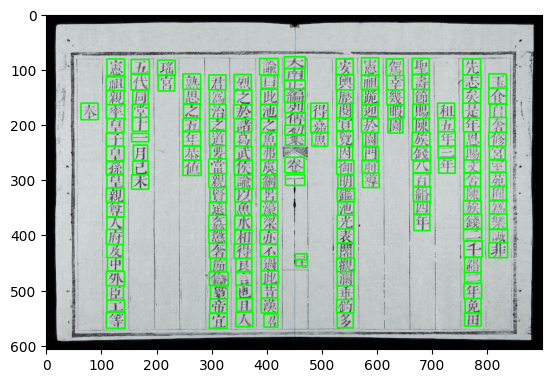

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/drive/MyDrive/wb_localization_dataset/train_data_anizme/images/val/nlvnpf-0137-01-050.jpg")
def rotate_image(image, angle):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2, height/2)
    size = (width, height)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    res = cv2.warpAffine(image, rot_mat, size)
    return res

# Rotate the grayscale image
img_gray_rotated = rotate_image(img, 45)
# Make a prediction
results = model.predict(source=img, save=False, stream=True)
print(type(results))
# Visualize the results
for result in results:
    boxes = result.boxes  # Bounding box predictions
    print(f"Number of detected objects: {len(boxes)}")
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

    # Display the image with bounding boxes
    plt.imshow(img)